In [87]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
reviews = pd.read_csv('yelp.csv')
reviews.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


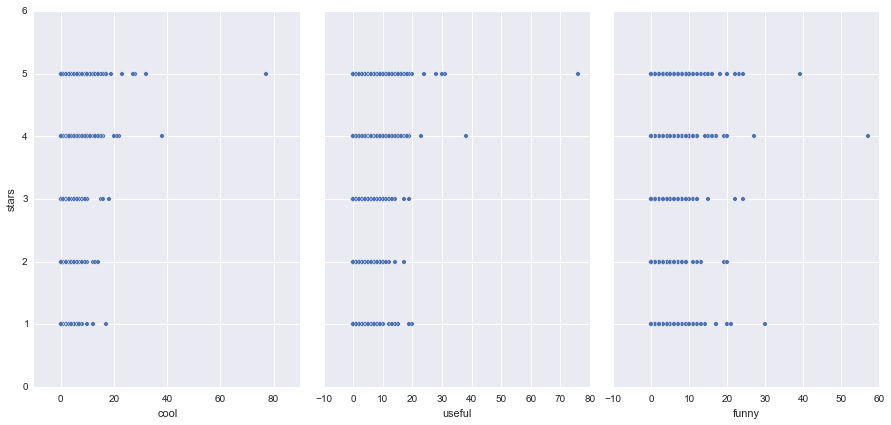

In [89]:
sns.pairplot(reviews, x_vars=['cool','useful', 'funny'], y_vars='stars', size=6, aspect=0.7)

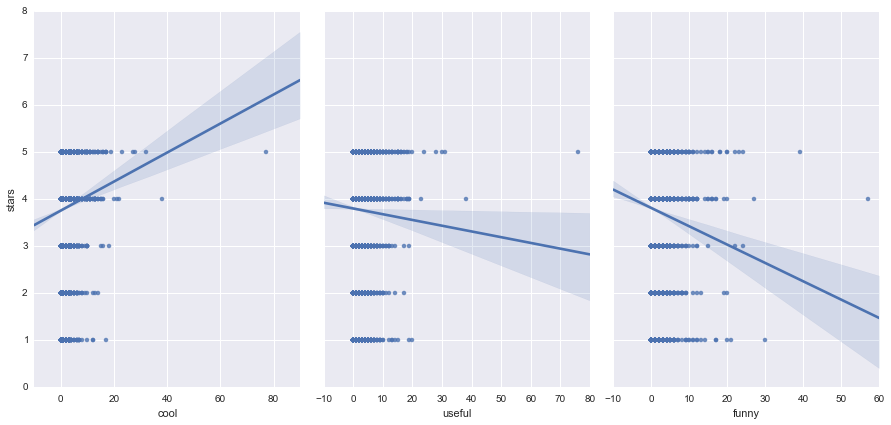

In [90]:
sns.pairplot(reviews, x_vars=['cool','useful', 'funny'], y_vars='stars', size=6, aspect=0.7, kind='reg')

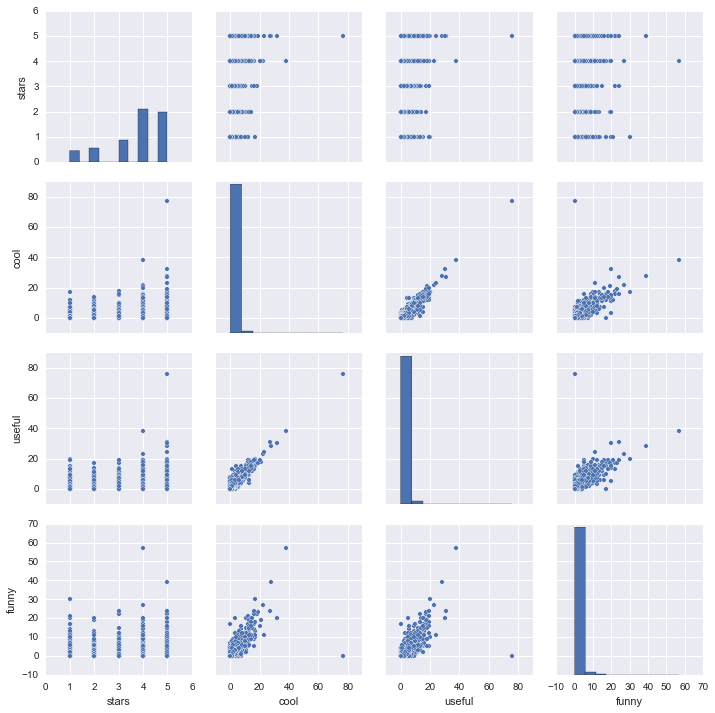

In [91]:
sns.pairplot(reviews)

In [92]:
reviews.corr()

,stars,cool,useful,funny
stars,1.000000,0.052555,-0.023479,-0.061306
cool,0.052555,1.000000,0.887102,0.764342
useful,-0.023479,0.887102,1.000000,0.723406
funny,-0.061306,0.764342,0.723406,1.000000


In [93]:
feature_cols = ['cool','useful', 'funny']
X = reviews[feature_cols]
y = reviews.stars

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print linreg.intercept_
print linreg.coef_

3.83989479278
[ 0.27435947 -0.14745239 -0.13567449]


In [94]:
# pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

[('cool', 0.27435946858852989),
 ('useful', -0.14745239099401236),
 ('funny', -0.13567449053706199)]

In [95]:
feature_cols = ['cool','useful', 'funny']
X = reviews[feature_cols]
y = reviews.stars

In [96]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values)

In [97]:
from sklearn.cross_validation import cross_val_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

lreg = linear_model.LinearRegression()

In [98]:
#cross_val is flipping the signs
cross_val_score(lreg, X_train, y_train, cv=5, scoring="mean_squared_error")

array([-1.46775866, -1.34917079, -1.43552474, -1.53448078, -1.4000509 ])

In [99]:
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [100]:
y_predictions = lreg.predict(X_test)

In [101]:
mean_squared_error(y_predictions, y_test)

1.3730082010721154

In [102]:
feature_cols = ['cool']
X = reviews[feature_cols]
y = reviews.stars

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values)

In [104]:
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [105]:
y_predictions = lreg.predict(X_test)

In [106]:
mean_squared_error(y_predictions, y_test)

1.4726291278862322

In [107]:
feature_cols = ['cool', 'useful']
X = reviews[feature_cols]
y = reviews.stars

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values)

In [109]:
lreg.fit(X_train, y_train)
y_predictions = lreg.predict(X_test)
mean_squared_error(y_predictions, y_test)

1.4077441979299086

In [110]:
feature_cols = ['cool', 'funny']
X = reviews[feature_cols]
y = reviews.stars

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values)

lreg.fit(X_train, y_train)
y_predictions = lreg.predict(X_test)
mean_squared_error(y_predictions, y_test)

1.4705901230044298

In [111]:
#mean_squared_error shows that including all 3 featues cool, funny, useful is the best predictive model for stars

In [112]:
feature_cols = ['cool','useful', 'funny']
X = reviews[feature_cols]
y = reviews.stars

In [114]:
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values)

lreg.fit(X_train, y_train)
y_predictions = lreg.predict(X_test)
mean_absolute_error(y_predictions, y_test)

0.96428269181179826